In [21]:
# math 
import numpy as np

# random
from numpy.random import rand, randn, choice
np.random.seed(6)

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# Problem setup

In [22]:
# plot line y = w*x+b
def plotline(w,b, xmin=-100,xmax=100,nsamples=100,label=''):
    x = np.linspace(xmin, xmax, nsamples)
    y = w * x + b
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

In [23]:
# plot function y = f(x)
def plotfunc(f, xmin=-100,xmax=100,nsamples=100,label=""):
    x = np.linspace(xmin, xmax, nsamples)
    y = f(x)
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

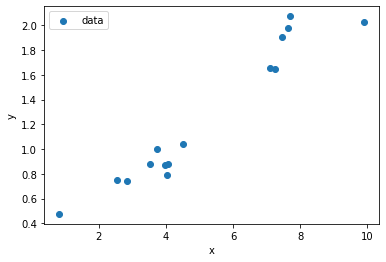

In [25]:
# Generate and plot data
n = 15
def sample_data(num_points):
    x = rand(num_points)*10
    y = .2 + .2*x + .1*np.sin(x) + .1*randn(num_points) - .01*((x-5)/6)**4
    return x,y

x,y = sample_data(n)


def plotdata(x=x,y=y, margin=.05):
    plt.scatter(x,y, label="data")
    plt.legend(loc="upper left")
    plt.xlabel("x") 
    plt.ylabel("y")     
    range_y = np.max(y) - np.min(y)
    range_x = np.max(x) - np.min(x)
    plt.ylim([np.min(y)-margin*range_y,np.max(y)+margin*range_y])
    plt.xlim([np.min(x)-margin*range_x,np.max(x)+margin*range_x])
    
plotdata()
plt.show()

# Bootstrap estimators

In [37]:
# sample K data sets of n samples each and compute a model on each
# see how the models vary
n = 50
K = 500

models = np.zeros((K,2))
for k in range(K):
    xk,yk = sample_data(n) # this experiment samples from the true data distribution many many times (not realistic)
    Xk = np.column_stack([xk, np.ones(xk.shape)])
    wk = np.linalg.lstsq(Xk, yk, rcond=None)[0]
    models[k,:] = wk

When n decreases, the support of the distribution of the first coefficient 
* A) gets narrower
* B) gets wider


When K increases, the distribution of the first coefficient 
* A) gets narrower
* B) gets wider
* C) gets smoother
* D) gets more wiggly

(array([ 1.,  1.,  0.,  3.,  3., 10.,  8., 19., 36., 48., 54., 62., 66.,
        57., 39., 37., 21., 29.,  4.,  2.]),
 array([0.09370089, 0.10461259, 0.1155243 , 0.12643601, 0.13734771,
        0.14825942, 0.15917113, 0.17008283, 0.18099454, 0.19190625,
        0.20281795, 0.21372966, 0.22464137, 0.23555308, 0.24646478,
        0.25737649, 0.2682882 , 0.2791999 , 0.29011161, 0.30102332,
        0.31193502]),
 <a list of 20 Patch objects>)

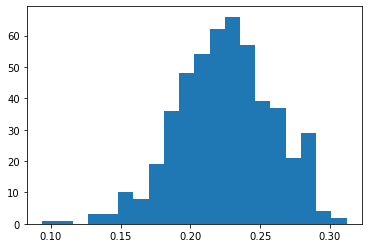

In [38]:
# histogram of the distribution of the first coefficient
# could use to compute, eg, confidence intervals

plt.hist(models[:,1], bins=20)

In [39]:
np.mean(models, axis=0)

array([0.19852618, 0.22514584])

In [40]:
np.var(models,axis=0)

array([3.14117088e-05, 1.19904461e-03])

In [50]:
# can sample with replacement using choice
choice(range(5), 5)

array([2, 1, 2, 2, 3])

In [51]:
# eg,
a = np.sort(rand(20))
s = choice(range(20), 5)
np.column_stack([s, a[s]])

array([[15.        ,  0.56474272],
       [19.        ,  0.94586168],
       [ 7.        ,  0.23688074],
       [17.        ,  0.8963133 ],
       [ 2.        ,  0.06753065]])

In [70]:
# resample K bootstrap data sets of n samples each and compute a model on each
# see how the models vary
# how does result depend on number of datapoints n? number of resamples K?
n = 50
K = 1000

x,y = sample_data(n) # this is the only data we've got!

models = np.zeros((K,2))
for k in range(K):
    mysample = choice(range(n),n)
    xk,yk = x[mysample], y[mysample]
    Xk = np.column_stack([xk, np.ones(n)])
    wk = np.linalg.lstsq(Xk, yk, rcond=None)[0]
    models[k,:] = wk

(array([  3.,   2.,   1.,  11.,  15.,  30.,  40.,  51.,  90.,  88.,  96.,
        116., 121., 122.,  81.,  49.,  42.,  23.,  10.,   9.]),
 array([0.01516064, 0.0308726 , 0.04658457, 0.06229653, 0.07800849,
        0.09372045, 0.10943241, 0.12514438, 0.14085634, 0.1565683 ,
        0.17228026, 0.18799222, 0.20370419, 0.21941615, 0.23512811,
        0.25084007, 0.26655204, 0.282264  , 0.29797596, 0.31368792,
        0.32939988]),
 <a list of 20 Patch objects>)

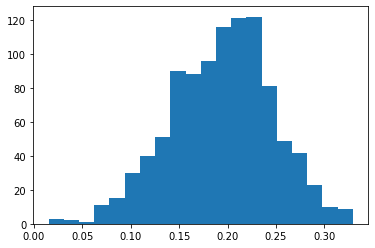

In [71]:
plt.hist(models[:,1], bins=20)

In [66]:
np.mean(models,axis=0)

array([0.19439469, 0.28504352])

In [69]:
# as K increases, mean of the bootstrap models should converge to 
# the model fit on the original data set
X = np.column_stack([x, np.ones(n)])
w = np.linalg.lstsq(X,y,rcond=None)[0]
w

array([0.19443163, 0.28558029])

In [68]:
np.var(models,axis=0)

array([1.64722761e-05, 7.51630697e-04])

# Bootstrap to compute variance of prediction

In [16]:
# sample data
x,y = sample_data(n)

# compute feature transformation
def phi(x): return np.ones((len(x),1))   # mean
def phi(x): return np.reshape(x, (len(x),1)) # linear model without offset
# def phi(x): return np.column_stack([x, np.ones(x.shape)]) # linear model with offset
# def phi(x): return np.column_stack([np.power(x,k) for k in range(5)]) # 4th order polynomial model
X = phi(x)
X.shape

(50, 1)

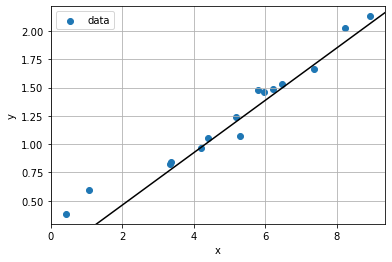

In [17]:
# fit model
w = np.linalg.lstsq(X, y, rcond=None)[0]
def g(x): return phi(x).dot(w)

# plot
plotdata()
plotfunc(g, xmin=0, xmax=10)

(array([ 3.,  5.,  7., 17., 23., 20., 16.,  3.,  5.,  1.]),
 array([0.75231804, 0.76246301, 0.77260798, 0.78275295, 0.79289791,
        0.80304288, 0.81318785, 0.82333282, 0.83347779, 0.84362275,
        0.85376772]),
 <a list of 10 Patch objects>)

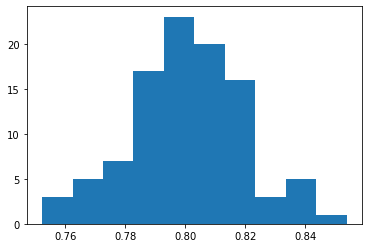

In [20]:
x0,y0 = sample_data(n) # sample data
stats = []
for k in range(100):
    # sample new data
#     x,y = sample_data(n)
    # resample data (bootstrap)
    samples = choice(range(n),n)
    x,y = x0[samples], y0[samples] 

    # compute feature transformation
    # def phi(x): return np.ones((len(x),1))   # mean
    # def phi(x): return np.reshape(x, (len(x),1)) # linear model without offset
    def phi(x): return np.column_stack([x, np.ones(len(x))]) # linear model with offset
    # def phi(x): return np.column_stack([np.power(x,k) for k in range(5)]) # 4th order polynomial model
    X = phi(x)

    # fit model
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    def g(x): return phi(x).dot(w)
    
    stats.append(g([3]))
    
stats=np.concatenate(stats)
plt.hist(stats,bins=10)    